# 딥러닝 문제 해결
**손글씨 숫자를 분류하다**

In [ ]:
# 라이브러리 불러오기
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#데이터 불러오기
mnist = keras.datasets.mnist # MNIST 데이터 셋은 케라스에서 지원
(x_train, y_train), (x_test, y_test) = mnist.load_data()

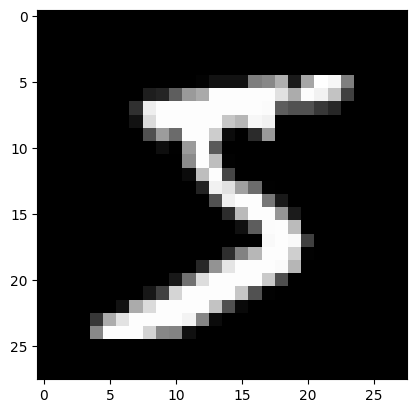

In [ ]:
#훈련 데이터의 첫 번째 이미지 출력하기
plt.imshow(x_train[0] , cmap = 'gray')
plt.show()

In [ ]:
# 47번째 해당하는 숫자가 어떻게 구성되어 있는지 살펴보기
for i in x_train[46]:
  for j in i:
    print(f'{j:4}', end='')
  print()

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   2 152 203 181 141  58  17   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0  40 172 247 188 232 234  35   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  17  82 101 143 252 245  67  35 225 214   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   5 132 237 254 254 254 254 254 243  80 210 248  35   0   0   0

In [ ]:
# 0~255 데이터를 0.0~1.0 사이의 실수로 표현(정규화)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
# 소숫점 4자리 까지 표현하여 출력
for data in x_train[46]:
  for i in data:
    print(f'{i:.4f}', end=' ')
  print()

0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 
0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 
0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 
0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 
0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 
0.0000 0.0000 0

In [ ]:
for data in x_train[46]:
  for i in data:
    if i == 0:
        print(f'{i:6}',end='')
    else:
        print(f'{i:.4f}', end='')
  print()

   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.00.00780.59610.79610.70980.55290.22750.0667   0.0   0.0   0.0   0.0   0.0   0.0   0.

In [ ]:
# x_train 값 확인하기
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
# 2차원 배열을 1차원 배열로 변환하기
np.reshape(x_train, -1)

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [ ]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape = [28, 28]),      # 입력층을 1차원으로 생성
  keras.layers.Dense(200, activation = 'relu'),      # 1번째 은닉층
  keras.layers.Dense(100, activation = 'relu'),      # 2번째 은닉층
  keras.layers.Dense(50, activation = 'relu'),       # 2번째 은닉층
  keras.layers.Dense(10, activation = 'softmax')])   # 출력층 생성

model

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<Sequential name=sequential_7, built=True>

In [ ]:
# 모델 컴파일하기, 최적화 함수, 손실 함수, 평가 지표 설정
model.compile(optimizer = 'adam', loss ='sparse_categorical_crossentropy',
              metrics = ['accuracy'] )

In [ ]:
model.fit(x_train, y_train, epochs = 5)  # 모델 학습시키기,  epochs: 반복 학습 회수

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8759 - loss: 0.4177
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9688 - loss: 0.1008
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9794 - loss: 0.0652
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9830 - loss: 0.0530
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9882 - loss: 0.0368


In [ ]:
model.evaluate(x_test, y_test)  # 학습 완료 후 모델 평가

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9726 - loss: 0.0955


[0.08252895623445511, 0.9761000275611877]

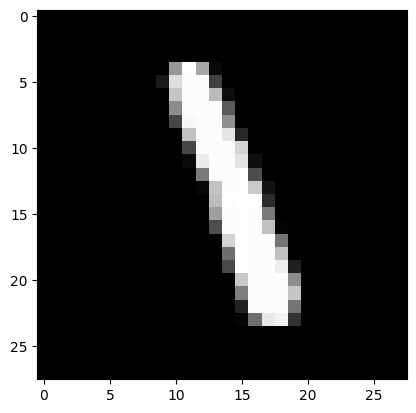

In [ ]:
plt.imshow(x_test[46].reshape(28, 28), cmap='gray')    # 테스트 데이터 47번째 출력하기
plt.show()

In [ ]:
print(y_test[46])    # 테스트 데이터 예측 결과 출력

1


In [ ]:
print(model.predict(x_test[46].reshape(1, 28, 28)))   # 47번 데이터 예측 결과 출력

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
[[1.1174749e-11 9.9968040e-01 7.6437405e-05 2.6959251e-05 7.0792281e-05
  4.0429985e-08 6.5387634e-10 1.2764091e-06 1.3523739e-04 8.9277873e-06]]


In [ ]:
print(np.argmax(model.predict(x_test[46].reshape(1, 28, 28))))  # 배열에서 가장 큰 값의 인덱스 반환

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1


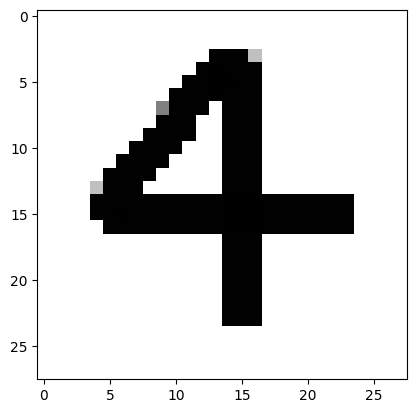

In [ ]:
import cv2

# 그림판 이미지 불러오기 (흑백)
img = cv2.imread("digit.png", cv2.IMREAD_GRAYSCALE)

# 28x28 크기로 줄이기
img = cv2.resize(img, (28,28))

plt.imshow(img, cmap='gray')

In [ ]:

# 색 반전 (배경 흰색, 글씨 검은색인 경우 필요)
img = 255 - img

# 정규화
img = img / 255.0

# (1,28,28) 형태로 만들기
img = img.reshape(1,28,28)


# 예측
pred = model.predict(img)
print("내가 쓴 숫자 예측 결과:", np.argmax(pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
내가 쓴 숫자 예측 결과: 8
